<a href="https://colab.research.google.com/github/anshika1712/Sentiment-Analysis-of-Dravidian-Code-Mixed-Texts/blob/main/mBert_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 12u1rovwuAQzytcPTtwx5tkxKnUoj_E1n                 #Train Data
# !gdown --id 1P-gVJf25YRNoHjOqzeDKwmVezQXz1dUa                 #Test Data
# !gdown --id 1OqgNXk3cwqRDCjh56qo6ua1q6qMzuLlM                 #Dev Data

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12u1rovwuAQzytcPTtwx5tkxKnUoj_E1n
To: /content/Train_Dataset_1.csv
100% 9.42M/9.42M [00:00<00:00, 75.5MB/s]


In [ ]:
!gdown --id 1unM_p_QH9zSA7q9gHK3xIeR0zrdrHKd8    #pytorch tools
!gdown --id 1US-Sz05dzQBOxqw_v2YbTWLlWt38Q9-S    #requirements

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1unM_p_QH9zSA7q9gHK3xIeR0zrdrHKd8
To: /content/pytorchtools.py
100% 2.11k/2.11k [00:00<00:00, 3.97MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1US-Sz05dzQBOxqw_v2YbTWLlWt38Q9-S
To: /content/requirements.txt
100% 29.0/29.0 [00:00<00:00, 45.0kB/s]


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
import pandas as pd
import numpy as np
import os
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Train_Dataset_1.csv')
df
# val_data=pd.read_csv('/content/Dev_Dataset_1.csv')
# test_data=pd.read_csv('/content/Test_Dataset1_withlabels.csv')

,Unnamed: 0,clean_text,tokenized_text,category
0,0,Vani bhojam fans hit like solli like Vangida V...,"['Vani', 'bhojam', 'fans', 'hit', 'like', 'sol...",unknown_state
1,1,I love you ajith very I like,"['I', 'love', 'you', 'ajith', 'very', 'I', 'li...",Positive
2,2,ennaya trailer Ku mudi Ellam nikkudhu Vera lev...,"['ennaya', 'trailer', 'Ku', 'mudi', 'Ellam', '...",Positive
3,3,Vijay Annaa Ur Maass Therrii,"['Vijay', 'Annaa', 'Ur', 'Maass', 'Therrii']",Positive
4,4,நம்ப நடே நாசாமா தான் போச்சி,"['நம்ப', 'நடே', 'நாசாமா', 'தான்', 'போச்சி']",Negative
...,...,...,...,...
35650,35651,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,"['ஒருவர்', 'செய்த', 'தவறுக்காக', 'எல்லாரையும்'...",Mixed_feelings
35651,35652,Repeated Mode to Watching Theri Trailer Theri ...,"['Repeated', 'Mode', 'to', 'Watching', 'Theri'...",Positive
35652,35653,yeevanikuachu pula kutti erudhal oodi poyidu m...,"['yeevanikuachu', 'pula', 'kutti', 'erudhal', ...",Negative
35653,35654,She is looking like laughing budha,"['She', 'is', 'looking', 'like', 'laughing', '...",Positive


In [ ]:
df['tokenized_text']=df['tokenized_text'].apply(eval)
# val_data['tokenized_text']=val_data['tokenized_text'].apply(eval)
# test_data['tokenized_text']=test_data['tokenized_text'].apply(eval)

In [ ]:
data=df[['clean_text','tokenized_text','category']][0:1000]
data.head()

,clean_text,tokenized_text,category
0,Vani bhojam fans hit like solli like Vangida V...,"[Vani, bhojam, fans, hit, like, solli, like, V...",unknown_state
1,I love you ajith very I like,"[I, love, you, ajith, very, I, like]",Positive
2,ennaya trailer Ku mudi Ellam nikkudhu Vera lev...,"[ennaya, trailer, Ku, mudi, Ellam, nikkudhu, V...",Positive
3,Vijay Annaa Ur Maass Therrii,"[Vijay, Annaa, Ur, Maass, Therrii]",Positive
4,நம்ப நடே நாசாமா தான் போச்சி,"[நம்ப, நடே, நாசாமா, தான், போச்சி]",Negative


In [ ]:
val_data=df[['clean_text','tokenized_text','category']][1000:1200]
val_data.head()

,clean_text,tokenized_text,category
1000,THALAPATHY KU NERAYA SIRIKIRAN rolling on the ...,"[THALAPATHY, KU, NERAYA, SIRIKIRAN, rolling, o...",unknown_state
1001,பிற்படுத்தப்பட்டோர் சார்பாக படம் வெற்றி பெற வா...,"[பிற்படுத்தப்பட்டோர், சார்பாக, படம், வெற்றி, ப...",Positive
1002,திரௌபதி திரைப்படம் மாபெரும் வெற்றி பெற வாழ்த்த...,"[திரௌபதி, திரைப்படம், மாபெரும், வெற்றி, பெற, வ...",Positive
1003,Intha Mari kena punda jathi veriyarkal irukira...,"[Intha, Mari, kena, punda, jathi, veriyarkal, ...",Negative
1004,power rangers paarta feel varudu,"[power, rangers, paarta, feel, varudu]",Mixed_feelings


In [ ]:
test_data=df[['clean_text','tokenized_text','category']][1200:1400]
test_data.head()

,clean_text,tokenized_text,category
1200,Mass thala marana mass,"[Mass, thala, marana, mass]",Positive
1201,OmG VJ anna semmeq semmeq trailer expectation ...,"[OmG, VJ, anna, semmeq, semmeq, trailer, expec...",Positive
1202,ஆட ஆரம்பிச்சா ஆயிரம் தகவல் தேட ஆரம்பிச்சா ஆயிர...,"[ஆட, ஆரம்பிச்சா, ஆயிரம், தகவல், தேட, ஆரம்பிச்ச...",Positive
1203,Evlo naal tha Diwali kku unga Vijay ae varuvar...,"[Evlo, naal, tha, Diwali, kku, unga, Vijay, ae...",Positive
1204,Rajini fans hit like Awesome tralier,"[Rajini, fans, hit, like, Awesome, tralier]",Positive


In [ ]:
df['category'].value_counts()

Positive          20070
unknown_state      5627
Negative           4271
Mixed_feelings     4020
not-Tamil          1667
Name: category, dtype: int64

In [ ]:
target_mapping={'unknown_state':0,
    'Positive':1,
    'Negative':2,
    'Mixed_feelings':3,
    'not-Tamil':4}

In [ ]:
#mapping label
data['SentimentMapped']=data['category'].map(lambda x:target_mapping[x])
val_data['SentimentMapped']=val_data['category'].map(lambda x:target_mapping[x])

In [ ]:
test_data['SentimentMapped']=test_data['category'].map(lambda x:target_mapping[x])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Maximum Sentence length: 101 




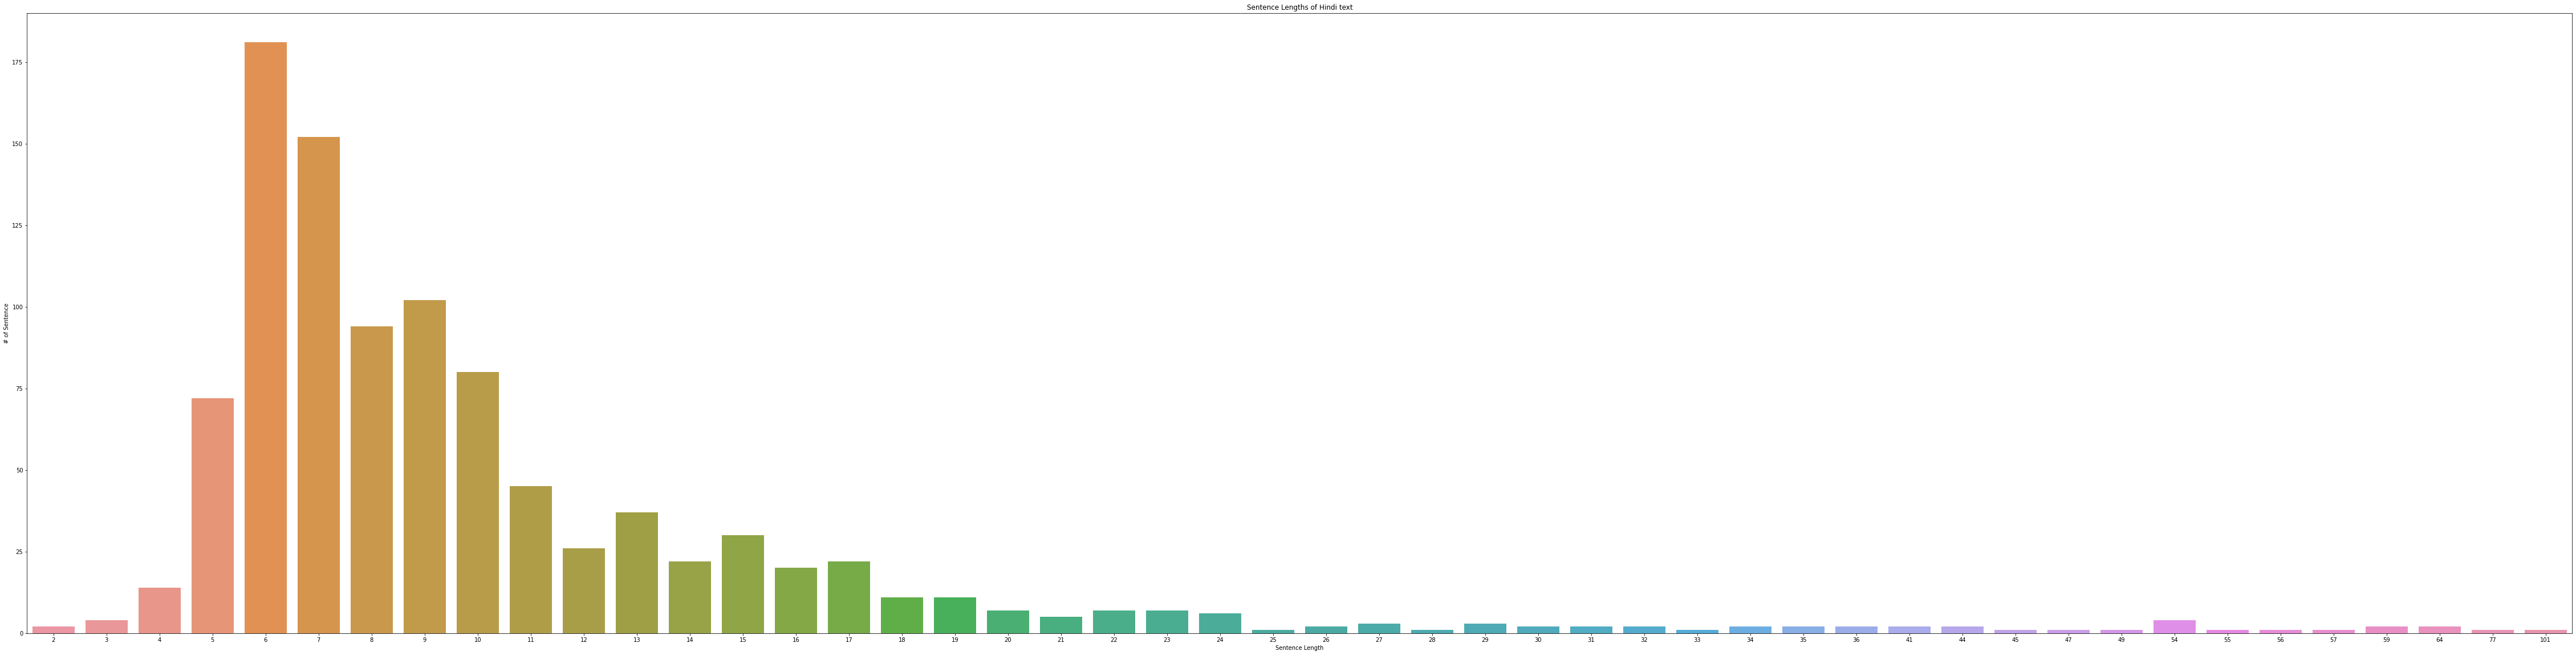

In [ ]:
#Max Length

sentence_length = []

for txt in data['tokenized_text']:
  sentence_length.append(len(txt))

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(80,20))
sns.countplot(sentence_length)

plt.title('Sentence Lengths of Hindi text')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentence')
print('Maximum Sentence length:', max(sentence_length), '\n\n')
plt.show()

100%|██████████| 200/200 [00:00<00:00, 647768.96it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Maximum Sentence length: 71 




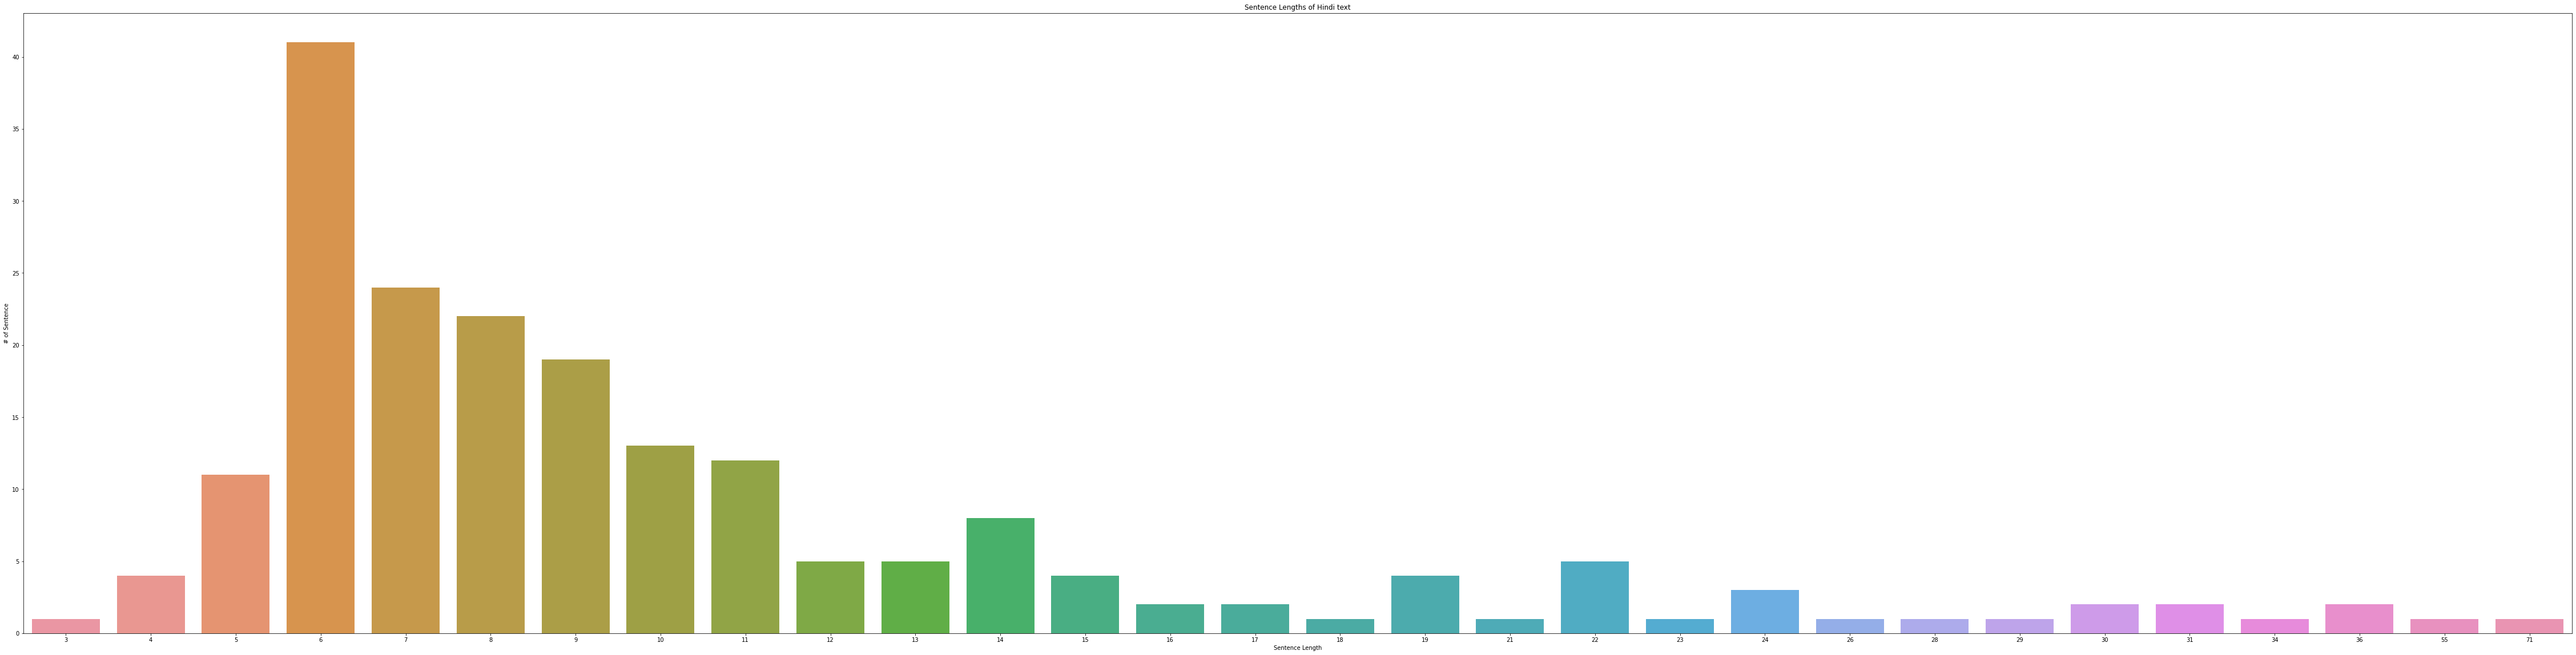

CPU times: user 814 ms, sys: 12.7 ms, total: 827 ms
Wall time: 820 ms


In [ ]:
#Max Length
%%time
sentence_length = []

for txt in tqdm(val_data['tokenized_text']):
  sentence_length.append(len(txt))

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(80,20))
sns.countplot(sentence_length)

plt.title('Sentence Lengths of Hindi text')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentence')
print('Maximum Sentence length:', max(sentence_length), '\n\n')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Maximum Sentence length: 54 




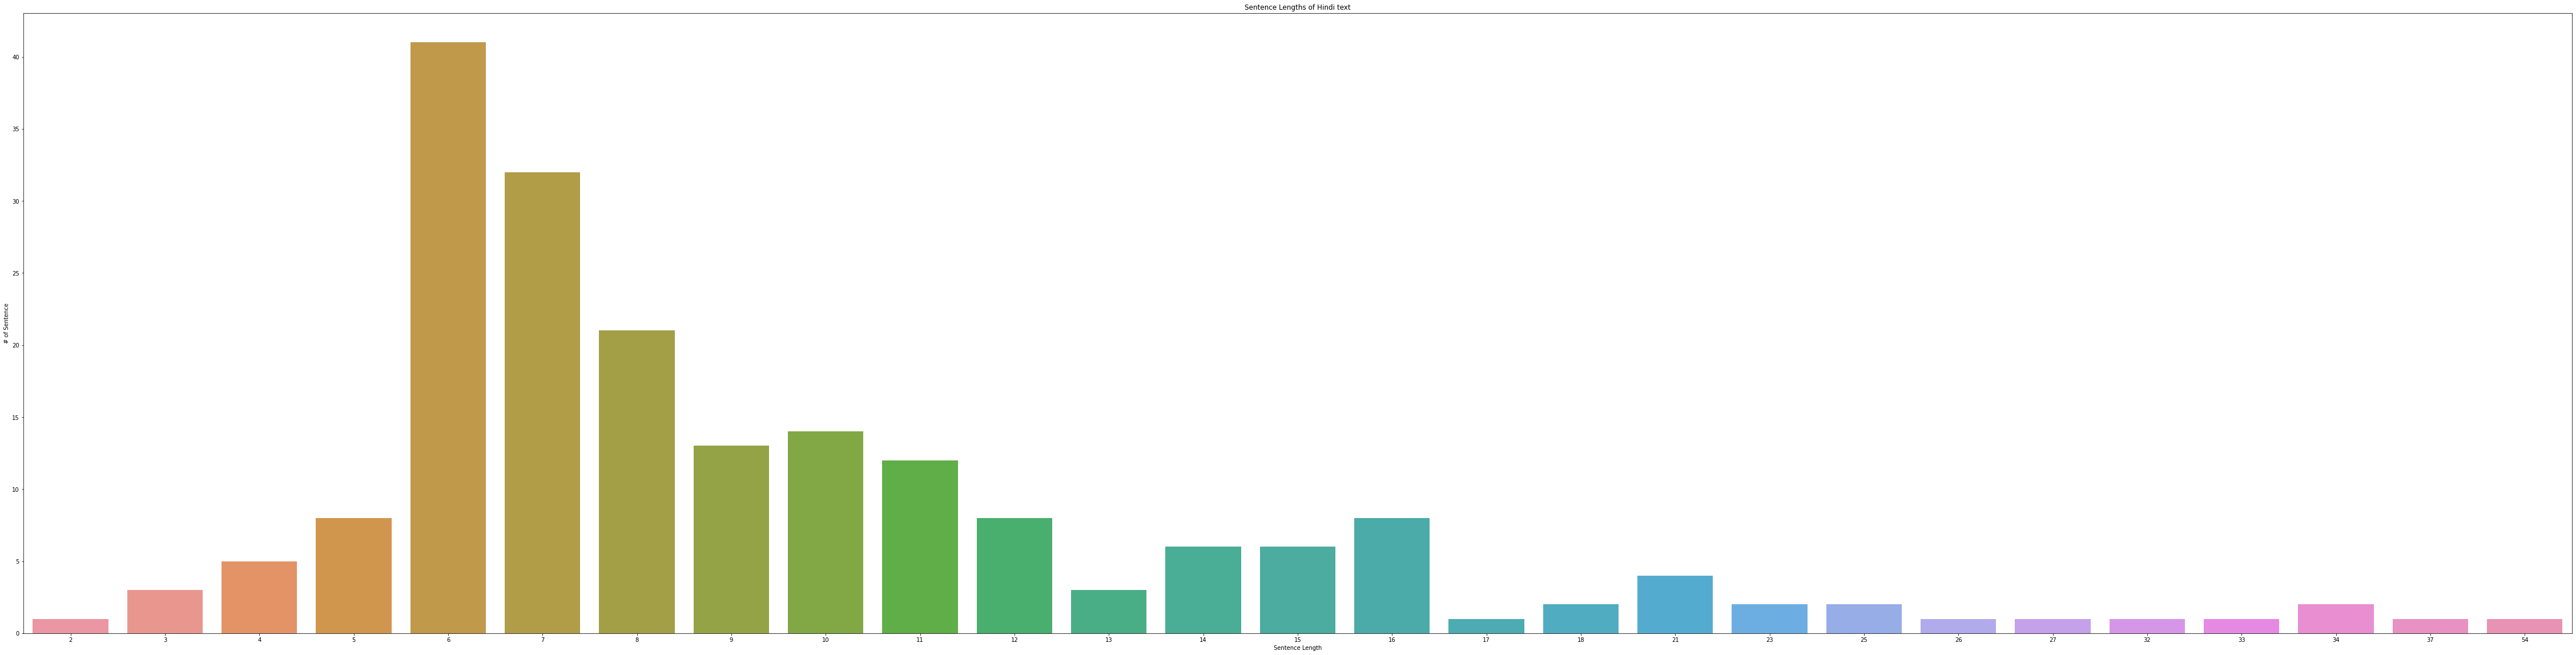

In [ ]:
#Max Length

sentence_length = []

for txt in test_data['tokenized_text']:
  sentence_length.append(len(txt))

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(80,20))
sns.countplot(sentence_length)

plt.title('Sentence Lengths of Hindi text')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentence')
print('Maximum Sentence length:', max(sentence_length), '\n\n')
plt.show()

In [ ]:
#train_data
sentences = data.clean_text.values
labels = data.SentimentMapped.values
#validation data
sentences1=val_data.clean_text.values
labels1=val_data.SentimentMapped.values

In [ ]:
#test_data
sentences2=test_data.clean_text.values
labels2=test_data.SentimentMapped.values

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 32.8 MB/s 
     |████████████████████████████████| 6.6 MB 52.9 MB/s 
     |████████████████████████████████| 101 kB 12.4 MB/s 
     |████████████████████████████████| 596 kB 65.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#sen='Ye Kya kardiya Supriya ne good job'

In [ ]:
# import transformers as tfs

# model_class, tokenizer_class, pretrained_weights = (tfs.BertModel, tfs.BertTokenizer, 'bert-base-multilingual-cased')
# tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
# model = model_class.from_pretrained(pretrained_weights)

# # Print the original sentence.
# print(' Original: ', sen)

# # Print the sentence split into tokens.
# print('Tokenized: ', tokenizer.tokenize(sen))

# # Print the sentence mapped to token ids.
# #print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[3])))

In [ ]:
%%time
#TRAINING DATASET
from transformers import AutoModel, AutoTokenizer
model_name='bert-base-multilingual-cased'
model=AutoModel.from_pretrained(model_name)
tokenizer=AutoTokenizer.from_pretrained(model_name)
#print('Tokenized: ', tokenizer.tokenize(sen))
input_ids=[]
for sent in tqdm(sentences):
  input=tokenizer.encode(sent)
  input_ids.append(input)


Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

100%|██████████| 1000/1000 [00:00<00:00, 10180.25it/s]

CPU times: user 18.2 s, sys: 3.21 s, total: 21.4 s
Wall time: 43 s


In [ ]:
sentence_length_after_processing = []
for s in input_ids:
  sentence_length_after_processing.append(len(s))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Maximum Sentence length: 265 




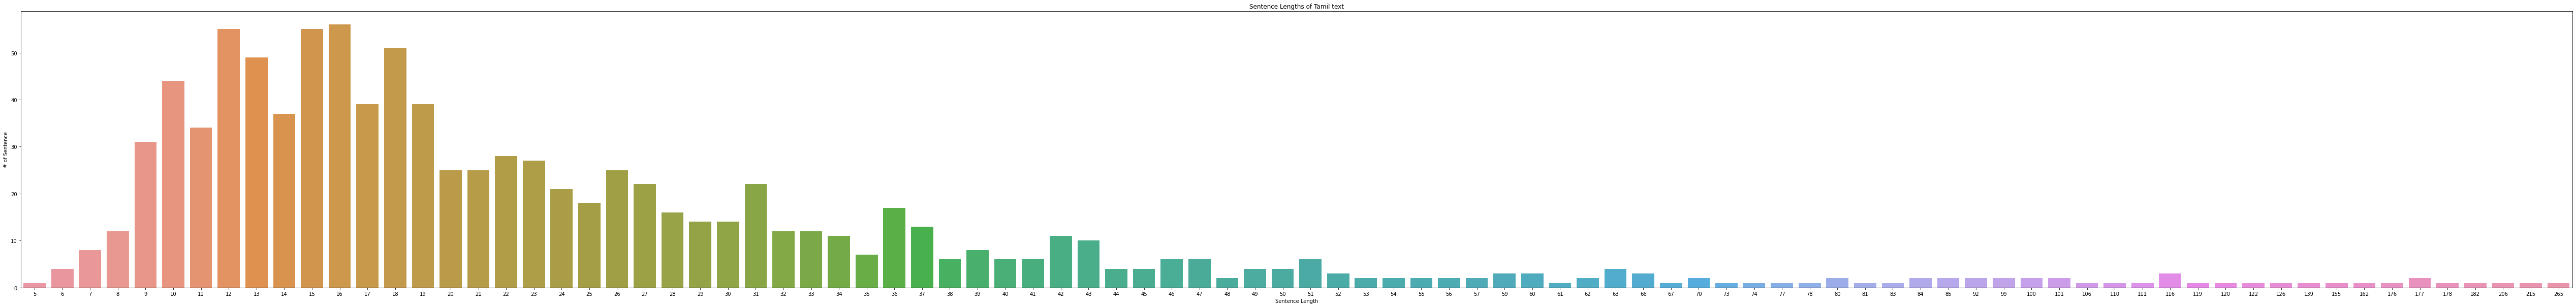

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(90,10))
sns.countplot(sentence_length_after_processing)

plt.title('Sentence Lengths of Tamil text')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentence')
print('Maximum Sentence length:', max(sentence_length_after_processing), '\n\n')
plt.show()

In [ ]:
# for s in input_ids:
#   print(s)
#256*2

512

In [ ]:
from keras_preprocessing.sequence import pad_sequences
MAX_LEN = 512

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_id = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 512 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
data['SentimentMapped'].value_counts()

1    574
0    147
3    120
2    112
4     47
Name: SentimentMapped, dtype: int64

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=17)
# input_ids, lbl = sm.fit_resample(input_id, labels)

from imblearn.combine import SMOTETomek
smtom=SMOTETomek(random_state=17)
input_ids, lbl = smtom.fit_resample(input_id, labels)


In [ ]:
unique, counts = np.unique(lbl, return_counts=True)

result = np.column_stack((unique, counts))
print (result)

[[  0 568]
 [  1 567]
 [  2 572]
 [  3 573]
 [  4 574]]


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:

    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

validation

In [ ]:
from transformers import AutoModel, AutoTokenizer
model_name='bert-base-multilingual-cased'
model=AutoModel.from_pretrained(model_name)
tokenizer=AutoTokenizer.from_pretrained(model_name)
input_ids1=[]
for sent in sentences1:
  input1=tokenizer.encode(sent)
  input_ids1.append(input1)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
sentence_length_after_processing1= []
for s in input_ids1:
  sentence_length_after_processing1.append(len(s))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Maximum Sentence length: 189 




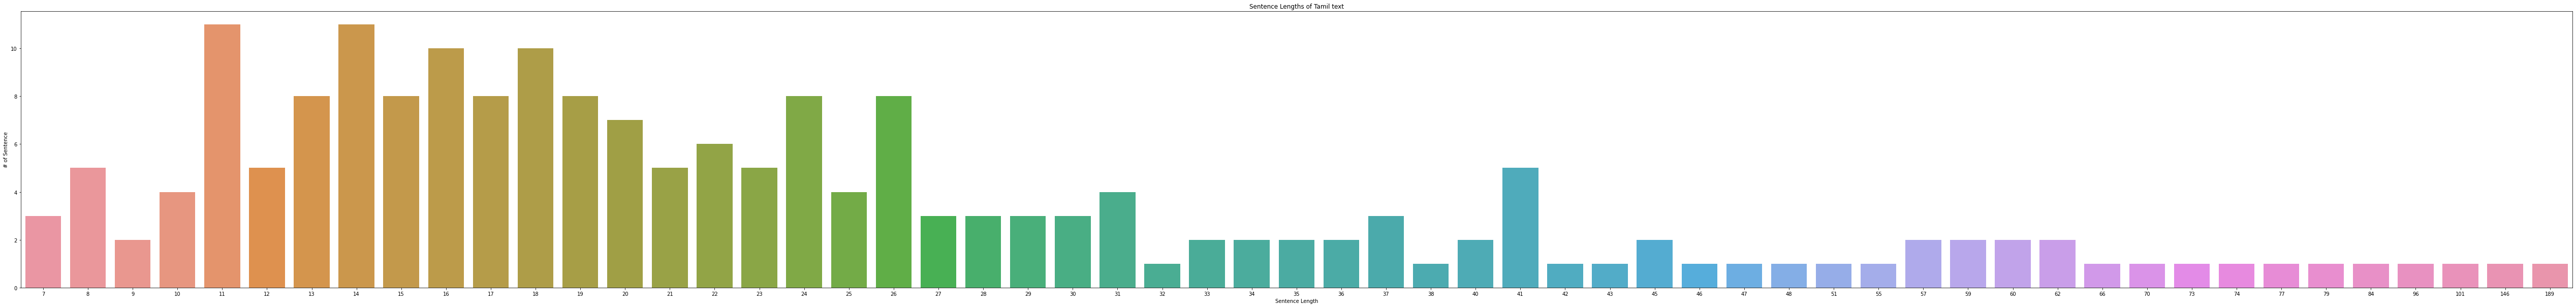

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(90,10))
sns.countplot(sentence_length_after_processing1)

plt.title('Sentence Lengths of Tamil text')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentence')
print('Maximum Sentence length:', max(sentence_length_after_processing1), '\n\n')
plt.show()

In [ ]:
from keras_preprocessing.sequence import pad_sequences
MAX_LEN = 512

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids1 = pad_sequences(input_ids1, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 512 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# Create attention masks
attention_masks1 = []

# For each sentence...
for sent in input_ids1:

    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask1 = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks1.append(att_mask1)

In [ ]:
#for training
train_inputs, validation_inputs, train_labels, validation_labels = (input_ids, input_ids1, lbl, labels1)
# Do the same for the masks.
train_masks, validation_masks = (attention_masks, attention_masks1)

In [ ]:
import tensorflow as tf
import torch

In [ ]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
train_inputs.size()

torch.Size([2854, 512])

In [ ]:
train_masks.size()

torch.Size([2854, 512])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 16
# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The mBert model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The mBert model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (119547, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias             

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
n_epochs = 100

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * n_epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# specify loss function
#criterion = nn.CrossEntropyLoss()

# specify optimizer
#optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, label):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = label.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import torchvision
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import EarlyStopping
!pip install pytorchtools
from pytorchtools import EarlyStopping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Set the seed value all over the place to make this reproducible.
seed_val = 42
import random
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def train_model(model, batch_size, patience, n_epochs):
  # to track the training loss as the model trains
  train_losses = []
  # to track the validation loss as the model trains
  valid_losses = []
  # to track the average training loss per epoch as the model trains
  avg_train_losses = []
  # to track the average validation loss per epoch as the model trains
  avg_valid_losses = []

  # initialize the early_stopping object
  early_stopping = EarlyStopping(patience=patience, verbose=True)

  for epoch in range(1, n_epochs + 1):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch, n_epochs+1))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    model.train() # prep model for training

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
      # Progress update every 40 batches.
      if step % 40 == 0 and not step == 0:
        # Calculate elapsed time in minutes.
        elapsed = format_time(time.time() - t0)

        # Report progress.
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
      b_input_ids = batch[0].to(device)
      b_input_mask = batch[1].to(device)
      b_labels = batch[2].to(device)
      optimizer.zero_grad()

      # outputs prior to activation.
      outputs = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
      loss=outputs.loss
      logits=outputs.logits
      loss.backward()
      train_losses.append(loss.item())

      #torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()
      scheduler.step()

# Measure how long this epoch took.
    training_time = format_time(time.time() - t0)
    print("")
    print("  Training epcoh took: {:}".format(training_time))
    print("")
    print("Running Validation...")

    t0 = time.time()
    model.eval() # prep model for evaluation
    # Tracking variables
    total_eval_accuracy = 0
    nb_eval_steps = 0


    # Evaluate data for one epoch
    for batch in validation_dataloader:
      b_input_ids1 = batch[0].to(device)
      b_input_mask1 = batch[1].to(device)
      b_labels1 = batch[2].to(device)
      with torch.no_grad():
        outputs1 = model(b_input_ids1,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask1,
                                   labels=b_labels1)
        # record validation loss
      valid_losses.append(outputs1.loss.item())
      # Move logits and labels to CPU
      logits1 = outputs1.logits.detach().cpu().numpy()
      label_ids1 = b_labels.to('cpu').numpy()
      total_eval_accuracy += flat_accuracy(logits1, label_ids1)
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = np.average(train_losses)
    avg_train_losses.append(train_loss)
    valid_loss = np.average(valid_losses)
    avg_valid_losses.append(valid_loss)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    print("  Validation took: {:}".format(validation_time))

    epoch_len = len(str(n_epochs))
    print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
    print(print_msg)

    # clear lists to track next epoch
    train_losses = []
    valid_losses = []
    # early_stopping needs the validation loss to check if it has decresed,
    # and if it has, it will make a checkpoint of the current model
    early_stopping(valid_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break
# load the last checkpoint with the best model
  model.load_state_dict(torch.load('checkpoint.pt'))

  return  model, avg_train_losses, avg_valid_losses



In [ ]:
# import torch
# torch.cuda.empty_cache()

In [ ]:
n_epochs = 100
# early stopping patience; how long to wait after last time validation loss improved.
patience = 5

model, t_loss, v_loss = train_model(model, batch_size, patience, n_epochs)


======== Epoch 1 / 101 ========
Training...
  Batch    40  of    179.    Elapsed: 0:00:55.
  Batch    80  of    179.    Elapsed: 0:01:49.
  Batch   120  of    179.    Elapsed: 0:02:45.
  Batch   160  of    179.    Elapsed: 0:03:41.

  Training epcoh took: 0:04:07

Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


  Accuracy: 0.00
  Validation took: 0:00:07
[  1/100] train_loss: 1.38357 valid_loss: 1.17814
Validation loss decreased (inf --> 1.178143).  Saving model ...

======== Epoch 2 / 101 ========
Training...
  Batch    40  of    179.    Elapsed: 0:00:57.
  Batch    80  of    179.    Elapsed: 0:01:54.
  Batch   120  of    179.    Elapsed: 0:02:51.
  Batch   160  of    179.    Elapsed: 0:03:47.

  Training epcoh took: 0:04:14

Running Validation...
  Accuracy: 0.00
  Validation took: 0:00:07
[  2/100] train_loss: 1.30850 valid_loss: 1.07658
Validation loss decreased (1.178143 --> 1.076579).  Saving model ...

======== Epoch 3 / 101 ========
Training...
  Batch    40  of    179.    Elapsed: 0:00:57.
  Batch    80  of    179.    Elapsed: 0:01:54.
  Batch   120  of    179.    Elapsed: 0:02:51.
  Batch   160  of    179.    Elapsed: 0:03:48.

  Training epcoh took: 0:04:14

Running Validation...
  Accuracy: 0.00
  Validation took: 0:00:07
[  3/100] train_loss: 1.23269 valid_loss: 1.14785
EarlyStop

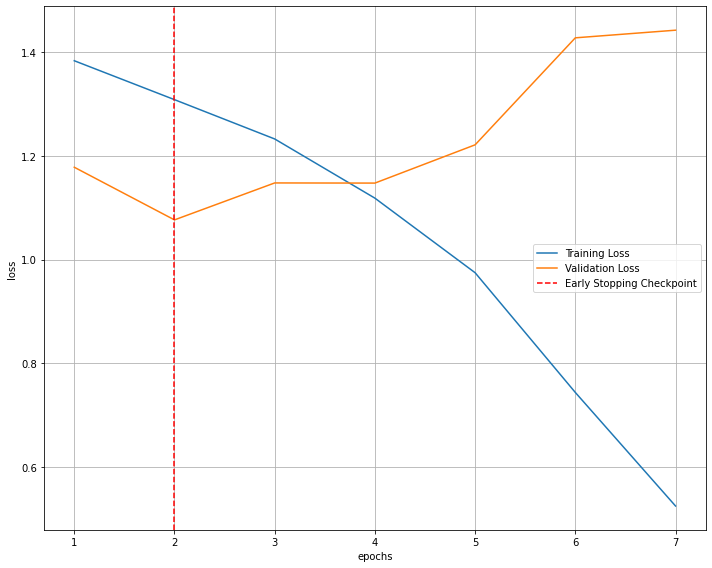

In [ ]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(t_loss)+1),t_loss, label='Training Loss')
plt.plot(range(1,len(v_loss)+1),v_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = v_loss.index(min(v_loss))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
# plt.ylim(0, 0.5) # consistent scale
# plt.xlim(0, len(t_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

Testing


In [ ]:
input_ids2=[]
attention_masks2=[]
for sent in sentences2:
  # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
  encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
  input_ids2.append(encoded_dict['input_ids'])
  attention_masks2.append(encoded_dict['attention_mask'])

input_ids2 = torch.cat(input_ids2, dim=0)
attention_masks2 = torch.cat(attention_masks2, dim=0)
labels2 = torch.tensor(labels2)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Set the batch size.
batch_size = 16

# Create the DataLoader.
prediction_data = TensorDataset(input_ids2, attention_masks2, labels2)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(input_ids2)))

model.to(device)
# Put model in evaluation mode
model.eval()

# Tracking variables
predictions, true_labels = [],[]

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids2, b_input_mask2, b_labels2 = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs2 = model(b_input_ids2, token_type_ids=None,
                      attention_mask=b_input_mask2)

  logits2 = outputs2[0]

  # Move logits and labels to CPU
  logits2 = logits2.detach().cpu().numpy()
  label_ids2 = b_labels2.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits2)
  true_labels.append(label_ids2)

print('    DONE.')

Predicting labels for 200 test sentences...
    DONE.


In [ ]:
predictions


In [ ]:
test_prediction = []

# Evaluate each test batch using Matthew's correlation coefficient
#print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0"
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

  # Calculate and store the coef for this batch.
  #matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
  test_prediction.append(pred_labels_i)

In [ ]:
l=[]
for i in true_labels:
  for k in i:
    l.append(k)

l

In [ ]:
true_labels

[array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]),
 array([2, 3, 2, 1, 0, 1, 3, 4, 1, 3, 1, 0, 4, 1, 1, 2]),
 array([3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1]),
 array([1, 0, 1, 3, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3]),
 array([4, 0, 0, 1, 3, 1, 0, 1, 2, 1, 2, 4, 1, 1, 1, 0]),
 array([1, 1, 3, 1, 1, 3, 0, 1, 1, 0, 4, 1, 3, 4, 1, 0]),
 array([1, 2, 1, 1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 0, 1, 3]),
 array([1, 1, 1, 0, 1, 3, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1]),
 array([3, 1, 1, 1, 0, 0, 2, 1, 3, 2, 0, 1, 1, 3, 1, 1]),
 array([1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1]),
 array([2, 1, 0, 3, 1, 2, 1, 1, 0, 3, 1, 0, 4, 3, 3, 1]),
 array([1, 0, 3, 0, 1, 1, 1, 3, 2, 3, 0, 0, 0, 2, 1, 3]),
 array([1, 1, 4, 0, 1, 0, 1, 1])]

In [ ]:
new_predictions = [test_prediction for sublist in test_prediction for test_prediction in sublist]
print(new_predictions)

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
y_true=l
y_pred=new_predictions
accuracy_score(y_true, y_pred, normalize=False)

104

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
# plt.show()


In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00        36
     class 1       0.54      0.96      0.69       108
     class 2       0.00      0.00      0.00        18
     class 3       0.00      0.00      0.00        30
     class 4       0.00      0.00      0.00         8

    accuracy                           0.52       200
   macro avg       0.11      0.19      0.14       200
weighted avg       0.29      0.52      0.37       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
class_list=['unknown_state', 'Positive', 'Negative','Mixed_feelings','not-Tamil']
l=[]
for i in range(len(new_predictions)):
  l.append(class_list[new_predictions[i]])

l

In [ ]:
with open(r'predicted_label.txt', 'w') as fp:
    for item in l:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')